## Final Project Submission

Please fill out:
* Student name: Solphine Joseph, Grace Rotich, Mathew Kiprotich, Hilary Simiyu, Clyde Ochieng.
* Student pace:  full time
* Scheduled project review date/time: 
* Instructor name: Nikita 
* Blog post URL:


# Kings County Housing Analysis with Multiple Linear Regression

## Overview


A real estate agency in Kingsway seeks to determine what are the contributing factors that affect the price of houses to make improvements where necessary. They want to employ an analytical approach rather than sentimental before arriving at a decision. Multilinear regression has been used for this project to understand how various features affect their pricing to better their services.

## Business Problem

In the face of market fluctuations and heightened competition within the real estate sector, our agency is grappling with pricing volatility, which poses significant challenges for our agents in devising effective business strategies. We seek strategic guidance to optimize our purchasing and selling endeavors, prioritizing informed decision-making to identify key areas of focus that promise maximum returns on investment.

### Objectives
* To determine the key factors influencing house prices.
* To develop multilinear regression models to predict house prices based on relevant features.
* To use insights from the regression analysis to optimize pricing strategies for both purchasing and selling properties.


### Data Understanding:

The real estate agency in Kingsway is analyzing a dataset to determine the factors affecting house prices. The dataset likely includes features such as property size, location, age, and market trends. Key steps include assessing data quality, exploring relationships between features and prices, and preprocessing data for multilinear regression analysis. Multilinear regression will be used to model how these features collectively influence house prices, with evaluation metrics used to assess predictive accuracy.

The dataset utilized in this analysis is the King County Housing dataset, encompassing details on over 21,000 homes within King County. Each entry in the dataset includes information on various features such as bedroom/bathroom/floor counts, living space and lot square footage, zip code, building grade, condition, and more.

The King County Housing Dataset comprises multiple features contributing to the final sale price of homes in King County. Descriptions of these features are provided below.

##### King County Housing Data Columns 

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house
* `condition` - How good the overall condition of the house is. 
* `grade` - Overall grade of the house. 
* `sqft_above` - Square footage of house apart from basement 
* `sqft_basement` - Square footage of the basement – (Ignored)
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated – (Ignored)
* `zipcode` - ZIP Code used by the United States Postal Service 
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

### Data Preparation

Importing data.

In [98]:
#importing libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [99]:
df = pd.read_csv('data/kc_house_data.csv')

In [100]:
df.shape

(21597, 21)

The dataset contains 21,597 houses with 21 features.

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [102]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000,17755.00000,21597.00000,21597.00000,21597.00000,21597.00000,21597.00000
mean,4580474287.77099,540296.57351,3.37320,2.11583,2080.32185,15099.40876,1.49410,1788.59684,1970.99968,83.63678,98077.95185,47.56009,-122.21398,1986.62032,12758.28351
std,2876735715.74778,367368.14010,0.92630,0.76898,918.10613,41412.63688,0.53968,827.75976,29.37523,399.94641,53.51307,0.13855,0.14072,685.23047,27274.44195
min,1000102.00000,78000.00000,1.00000,0.50000,370.00000,520.00000,1.00000,370.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2123049175.00000,322000.00000,3.00000,1.75000,1430.00000,5040.00000,1.00000,1190.00000,1951.00000,0.00000,98033.00000,47.47110,-122.32800,1490.00000,5100.00000
50%,3904930410.00000,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,1560.00000,1975.00000,0.00000,98065.00000,47.57180,-122.23100,1840.00000,7620.00000
75%,7308900490.00000,645000.00000,4.00000,2.50000,2550.00000,10685.00000,2.00000,2210.00000,1997.00000,0.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000
max,9900000190.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,9410.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


In [103]:
# descriptive statistics for our target price.
df['price'].describe()

count     21597.00000
mean     540296.57351
std      367368.14010
min       78000.00000
25%      322000.00000
50%      450000.00000
75%      645000.00000
max     7700000.00000
Name: price, dtype: float64

The average price of homes in the data set is 540,297 dollars. 
The prices ranges from 78,000 to 8,000,000 dollars and
the median house price is 450,000 dollars

In [104]:
# descriptive statistics for square footage
df['sqft_living'].describe()

count   21597.00000
mean     2080.32185
std       918.10613
min       370.00000
25%      1430.00000
50%      1910.00000
75%      2550.00000
max     13540.00000
Name: sqft_living, dtype: float64

The mean square-feet of living space is 2,080 sq-ft and the range of living space ranges from 370 sq-ft to 13,540 sq-ft. The median sq footage is 1,910.

In [105]:
df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

The bedroom counts range from 1 bedroom to 33

In [106]:
df['bathrooms'].value_counts()

bathrooms
2.50000    5377
1.00000    3851
1.75000    3048
2.25000    2047
2.00000    1930
1.50000    1445
2.75000    1185
3.00000     753
3.50000     731
3.25000     589
3.75000     155
4.00000     136
4.50000     100
4.25000      79
0.75000      71
4.75000      23
5.00000      21
5.25000      13
5.50000      10
1.25000       9
6.00000       6
0.50000       4
5.75000       4
6.75000       2
8.00000       2
6.25000       2
6.50000       2
7.50000       1
7.75000       1
Name: count, dtype: int64

In [107]:
df['floors'].value_counts()

floors
1.00000    10673
2.00000     8235
1.50000     1910
3.00000      611
2.50000      161
3.50000        7
Name: count, dtype: int64

In [108]:
df['sqft_lot'].value_counts()

sqft_lot
5000     358
6000     290
4000     251
7200     220
4800     119
        ... 
22605      1
25248      1
9934       1
9142       1
1076       1
Name: count, Length: 9776, dtype: int64

In [109]:
df['sqft_lot'].describe()

count     21597.00000
mean      15099.40876
std       41412.63688
min         520.00000
25%        5040.00000
50%        7618.00000
75%       10685.00000
max     1651359.00000
Name: sqft_lot, dtype: float64

In [110]:
df['yr_built'].value_counts()

yr_built
2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64

The year built ranges from 1934 to 2014.

In [111]:
df['condition'].value_counts()

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64

In [112]:
df['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

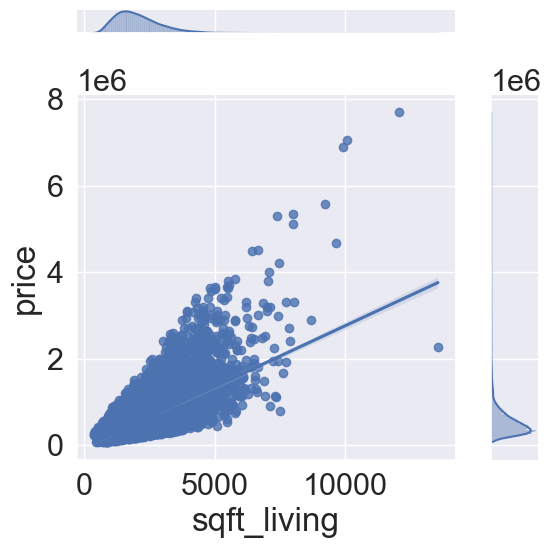

In [113]:
# examining the relationship between sqft_living and price
sns.jointplot(x='sqft_living', y='price', data=df, kind='reg')

plt.tight_layout()

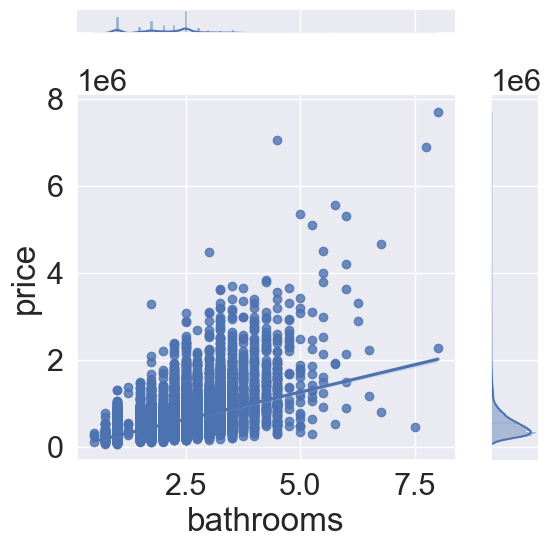

In [114]:
sns.jointplot(x='bathrooms', y='price', data=df, kind='reg')
plt.tight_layout()


## Data Preperation

Data Preparation Fundamentals - Applying appropriate preprocessing and feature engineering steps to tabular data in preparation for statistical modeling

Data Cleaning Steps
Handling Missing Values: Identify and address and missing values using techniques such as dropping or replacing data.

Handling Non-Numeric Data: A Linear regression model needs all of the features to be numeric, not categorical. Identify the data type 'object' and address them using techniques such as ordinal or one-hot encoding.

This notebook contains a breakdown of the step-by-step processes that we used to compile, scrub, and transform our data. It includes variations of narrowing our scope and explorations into the impacts that our different transformations have on the data.

### Preprocessing with Scikit-learn
Let explore and clean our data set to prep for our Linear Regression Model.
Preprocessing Steps.

1. Handle Missing Values
2. Convert Categorical Features into Numbers
3. Find and Remove Outliers

##### Handling Missing Values
Below, let's check to see if there are any NaNs in our data

In [115]:
#locate missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [116]:
#dealing with missing values
for column in df.columns:
    percentage_of_nan = (sum(df[column].isnull())/len(df[column])) * 100 
    print(column, percentage_of_nan)

id 0.0
date 0.0
price 0.0
bedrooms 0.0
bathrooms 0.0
sqft_living 0.0
sqft_lot 0.0
floors 0.0
waterfront 11.00152798999861
view 0.29170718155299347
condition 0.0
grade 0.0
sqft_above 0.0
sqft_basement 0.0
yr_built 0.0
yr_renovated 17.78950780200954
zipcode 0.0
lat 0.0
long 0.0
sqft_living15 0.0
sqft_lot15 0.0


The feature 'waterfront' is the only feature with missing values and about 11% of the values have NaNs. Lets investigate this feature to handle it's missing values

In [117]:
df['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

We can see that the 'waterfront' feature only has two values, yes or no.
Thus NaN values can be considered no because they do not exist in their homes.

In [118]:
df['waterfront'].fillna('NO', inplace=True)

In [119]:
df['waterfront'].value_counts()

waterfront
NO     21451
YES      146
Name: count, dtype: int64

In [120]:
#recheck for missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

##### Convert Categorical Features into Numbers

Our model would crash because some of the columns are non-numeric. Features with a numeric data type will work with our model, but these features need to be converted:
* waterfront (object)
* condition (object)
* grade (object)

Let's inspect the value counts of the specified features:

In [121]:
print(df['waterfront'].value_counts())
print()
print(df['condition'].value_counts())
print()
print(df['grade'].value_counts())

waterfront
NO     21451
YES      146
Name: count, dtype: int64

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64

grade
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: count, dtype: int64


##### Split function to seperate the numeric value of 'grade'

The Grade feature is an object data type however the numeric grade is listed in the front. We will use a simple string split function to isolate the numeric part of the feature.

Waterfront has only 2 categories and can be converted into binary in place, whereas Condition has more than 2 categories and will need to be expanded into multiple columns.

In [122]:
df = df.assign(grade=df.grade.str.split(' ')).explode('grade')

In [123]:
df.duplicated().value_counts()

False    46366
Name: count, dtype: int64

In [124]:
df = df.drop_duplicates()

In [125]:
df.shape

(46366, 21)

In [126]:
df = df.drop_duplicates(subset='id')

In [127]:
df.dropna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00000,3,1.00000,1180,5650,1.00000,NO,NONE,...,7,1180,0.0,1955,0.00000,98178,47.51120,-122.25700,1340,5650
1,6414100192,12/9/2014,538000.00000,3,2.25000,2570,7242,2.00000,NO,NONE,...,7,2170,400.0,1951,1991.00000,98125,47.72100,-122.31900,1690,7639
3,2487200875,12/9/2014,604000.00000,4,3.00000,1960,5000,1.00000,NO,NONE,...,7,1050,910.0,1965,0.00000,98136,47.52080,-122.39300,1360,5000
4,1954400510,2/18/2015,510000.00000,3,2.00000,1680,8080,1.00000,NO,NONE,...,8,1680,0.0,1987,0.00000,98074,47.61680,-122.04500,1800,7503
5,7237550310,5/12/2014,1230000.00000,4,4.50000,5420,101930,1.00000,NO,NONE,...,11,3890,1530.0,2001,0.00000,98053,47.65610,-122.00500,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.00000,3,2.50000,1530,1131,3.00000,NO,NONE,...,8,1530,0.0,2009,0.00000,98103,47.69930,-122.34600,1530,1509
21593,6600060120,2/23/2015,400000.00000,4,2.50000,2310,5813,2.00000,NO,NONE,...,8,2310,0.0,2014,0.00000,98146,47.51070,-122.36200,1830,7200
21594,1523300141,6/23/2014,402101.00000,2,0.75000,1020,1350,2.00000,NO,NONE,...,7,1020,0.0,2009,0.00000,98144,47.59440,-122.29900,1020,2007
21595,291310100,1/16/2015,400000.00000,3,2.50000,1600,2388,2.00000,NO,NONE,...,8,1600,0.0,2004,0.00000,98027,47.53450,-122.06900,1410,1287


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  object 
 9   view           21357 non-null  object 
 10  condition      21420 non-null  object 
 11  grade          21420 non-null  object 
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  object 
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   17616 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long       

In [129]:
df['grade'].value_counts()

grade
7     8889
8     6041
9     2606
6     1995
10    1130
11     396
5      234
12      88
4       27
13      13
3        1
Name: count, dtype: int64

The most common buiding grade is a 7

In [130]:
# Change the data type from object to int.
df['grade'] = df['grade'].astype(int)

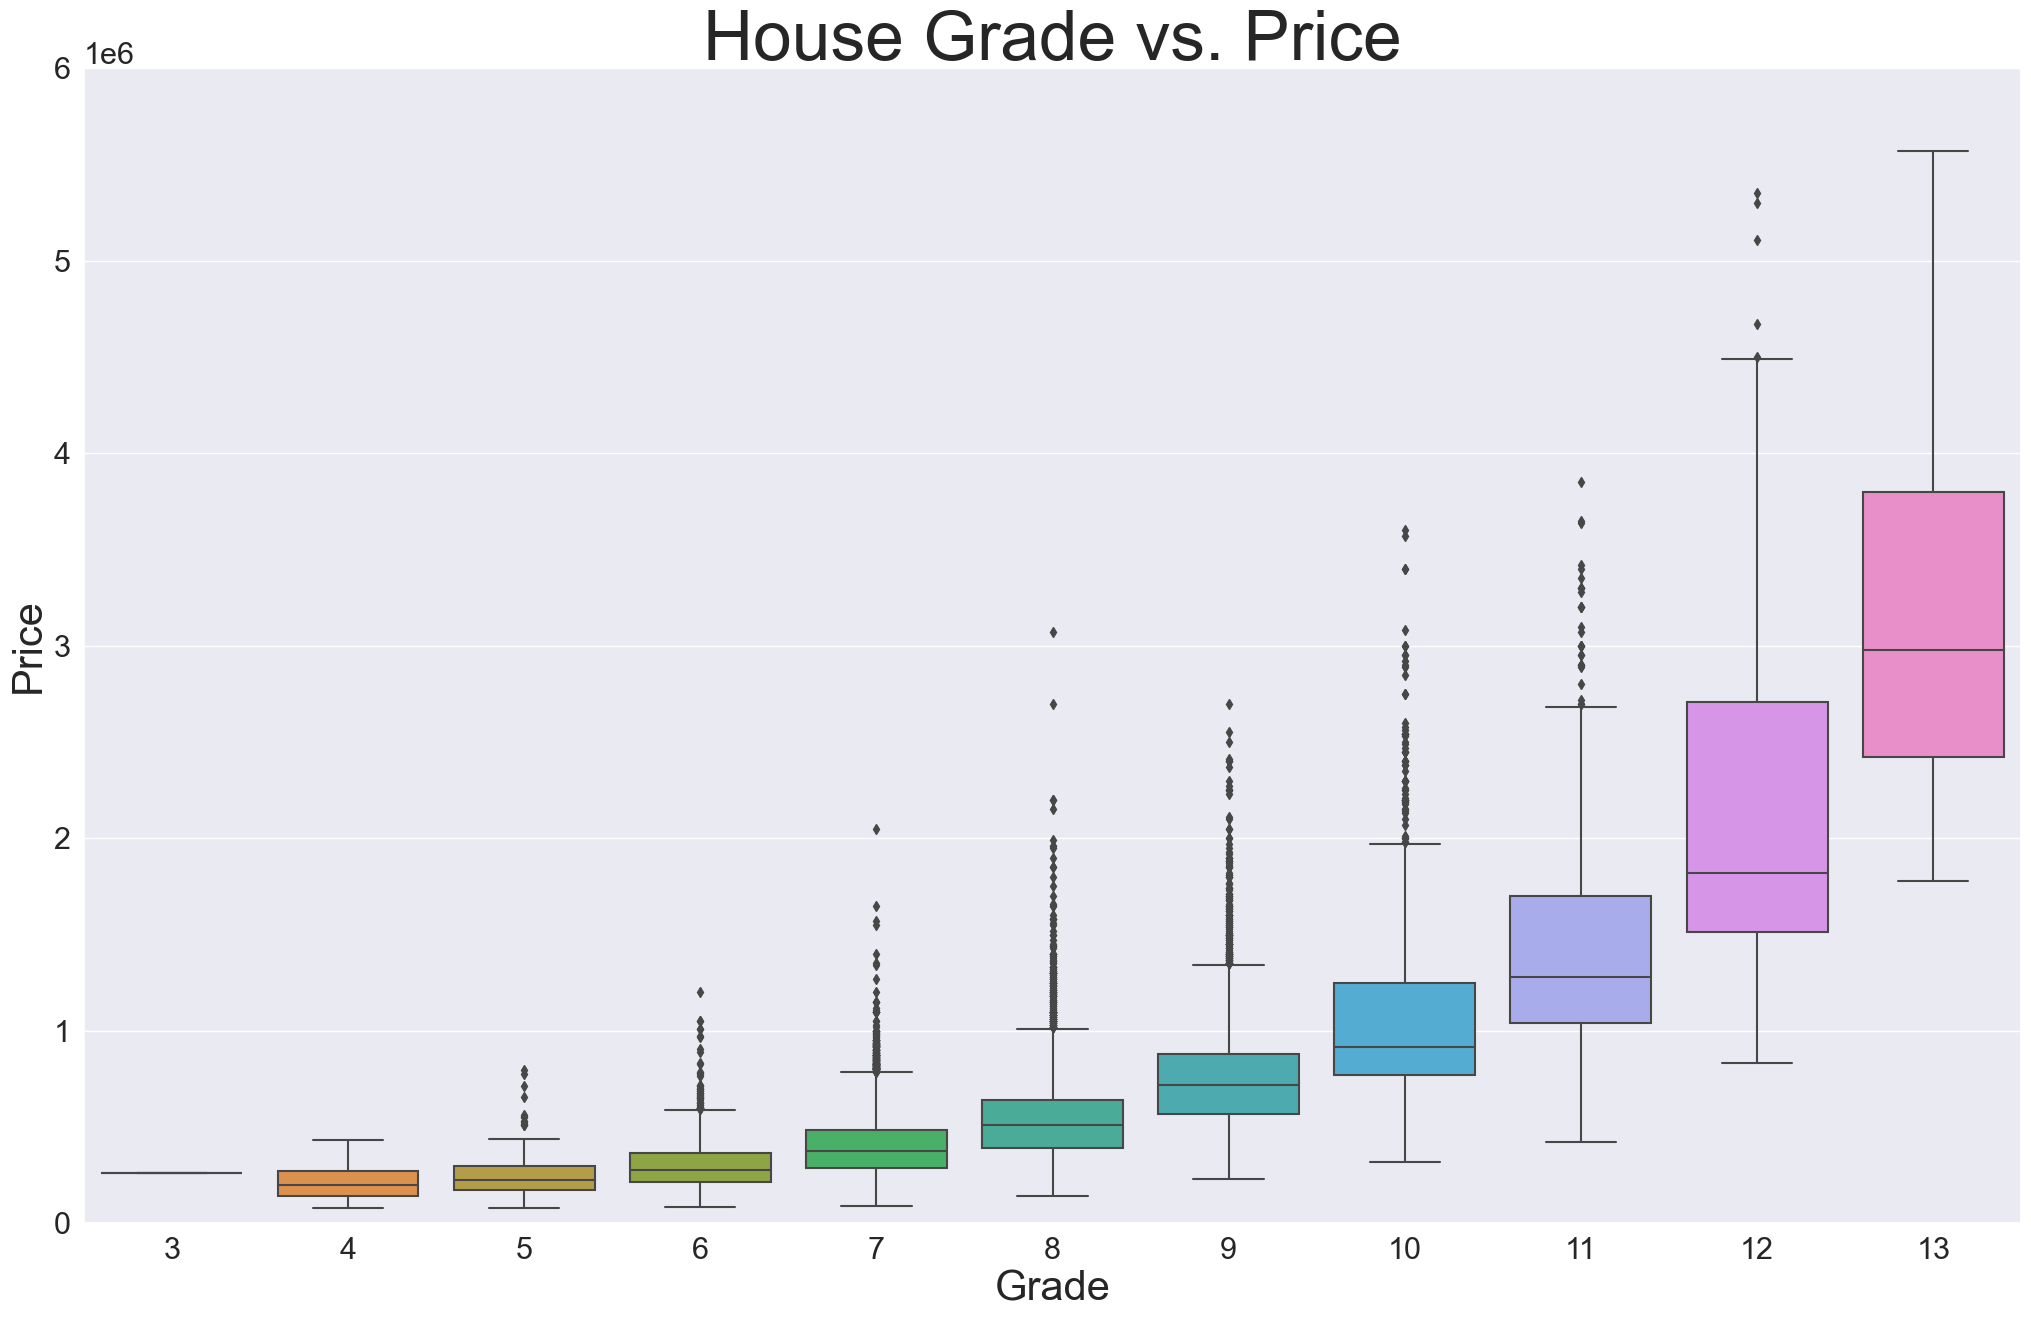

In [131]:
#grade
plt.figure(figsize=(25,15))
sns.set(font_scale=2)
ax = sns.boxplot(x="grade", y="price", data=df)
ax.set_title('House Grade vs. Price', fontsize=50)
ax.set_ylabel('Price', fontsize=30)
ax.set_xlabel('Grade', fontsize=30)
ax.set_ylim(bottom=0, top=6000000);

When we look at grade, we can see that as the categorical building grade designation improves, the house price does indeed rise as well. 